<a href="https://colab.research.google.com/github/jons255-p/Pythonuni/blob/master/ANALISIS_DE_PARAMETROS_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame



In [ ]:
data=pd.read_csv("ayacucho_2_baterry_2_ultimo.csv",encoding='latin1')

In [ ]:


data.head(10)

,Horas,Unnamed: 1,Time,Global Solar kW/m2,CanadianSolar All-Black CS6K-290MS Solar Altitude Â°,CanadianSolar All-Black CS6K-290MS Solar Azimuth Â°,CanadianSolar All-Black CS6K-290MS Angle of Incidence Â°,CanadianSolar All-Black CS6K-290MS Incident Solar kW/m2,CanadianSolar All-Black CS6K-290MS Power Output kw,CanadianSolar All-Black CS6K-290MS Cell Temperature Â°C,Ambient Temperature Â°C,DC Primary Load Kw,DC Primary Load Served(kW),Total Electrical Load Served(kW),Renewable Penetration(%),Excess Electrical Production(kw),Unmet Electrical Load(kw),Total Renewable Power Output(kw),Generic 1kWh Li-Ion [ASM] Maximum Charge Power(kw),Generic 1kWh Li-Ion [ASM] Maximum Discharge Power(kw),Generic 1kWh Li-Ion [ASM] Charge Power(kw),Generic 1kWh Li-Ion [ASM] Discharge Power(kw),Generic 1kWh Li-Ion [ASM] Input Power(kw),Generic 1kWh Li-Ion [ASM] Energy Content(kwh),Generic 1kWh Li-Ion [ASM] State of Charge(%),Generic 1kWh Li-Ion [ASM] Energy Cost(S/./kWh),Generic 1kWh Li-Ion [ASM] Temperature©,Generic 1kWh Li-Ion [ASM] Degradation - Time Z24and Temperature (%),Generic 1kWh Li-Ion [ASM] Degradation - Cycling (%),Generic 1kWh Li-Ion [ASM] Equivalent Cycles (cycles),AC Required Operating Capacity(kw),DC Required Operating Capacity(kw),AC Operating Capacity(kw),DC Operating Capacity (kw)
0,0,00:00,01/01/2007 00:00,0.000000,0.00000,-11.88790,90.00000,0.000000,0.000000,9.742831,9.742831,1.151635,1.151635,1.151635,0.00000,0.0,0.0,0.000000,0.000000,111.7042,0.000000,1.151635,-1.151635,152.3391,99.21808,0,20,0.000228,0.0,0.0,0,1.266798,0,111.7042
1,1,03/01/2114 01:00,01/01/2007 01:00,0.000000,0.00000,-31.77518,90.00000,0.000000,0.000000,9.742831,9.742831,1.145610,1.145610,1.145610,0.00000,0.0,0.0,0.000000,1.251938,110.6002,0.000000,1.145610,-1.145610,151.1444,98.44024,0,20,0.000457,0.0,0.0,0,1.260171,0,110.6002
2,2,05/01/2221 03:00,01/01/2007 02:00,0.000000,0.00000,-45.84701,90.00000,0.000000,0.000000,9.742831,9.742831,1.226462,1.226462,1.226462,0.00000,0.0,0.0,0.000000,2.497847,109.5015,0.000000,1.226462,-1.226462,149.8655,97.60748,0,20,0.000685,0.0,0.0,0,1.349109,0,109.5015
3,3,08/01/2328 06:00,01/01/2007 03:00,0.000000,0.00000,-55.24351,90.00000,0.000000,0.000000,9.742831,9.742831,1.284758,1.284758,1.284758,0.00000,0.0,0.0,0.000000,3.832310,108.3247,0.000000,1.284758,-1.284758,148.5257,96.73511,0,20,0.000913,0.0,0.0,0,1.413234,0,108.3247
4,4,09/01/2435 10:00,01/01/2007 04:00,0.000000,0.00000,-61.57349,90.00000,0.000000,0.000000,9.742831,9.742831,2.572097,2.572097,2.572097,0.00000,0.0,0.0,0.000000,5.230875,107.0913,0.000000,2.572097,-2.572097,145.8428,94.98797,0,20,0.001142,0.0,0.0,0,2.829307,0,107.0913
5,5,11/01/2542 15:00,01/01/2007 05:00,0.011037,0.00000,-65.89670,90.00000,0.000000,0.000000,9.742831,9.742831,3.824686,3.824686,3.824686,0.00000,0.0,0.0,0.000000,8.033814,104.6196,0.000000,3.824686,-3.824686,141.8525,92.38928,0,20,0.001370,0.0,0.0,0,4.207154,0,104.6196
6,6,13/01/2649 21:00,01/01/2007 06:00,0.020574,12.08639,-68.78173,82.89159,0.020307,3.039438,10.245300,9.742831,4.786978,4.786978,4.786978,63.49387,0.0,0.0,3.039438,12.207760,100.9389,0.000000,1.747541,-1.747541,140.0300,91.20248,0,20,0.001598,0.0,0.0,0,7.697226,0,103.9784
7,7,17/01/2756 04:00,01/01/2007 07:00,0.042152,25.79019,-70.43983,69.17883,0.041670,6.224764,10.774420,9.742831,4.752133,4.752133,4.752133,130.98880,0.0,0.0,6.224764,14.115890,99.2561,1.472630,0.000000,1.472630,141.4422,92.12243,0,20,0.001826,0.0,0.0,0,10.207160,0,105.4809
8,8,18/01/2863 12:00,01/01/2007 08:00,0.056638,39.58087,-70.71996,55.74148,0.056019,8.357199,11.130110,9.742831,5.944005,5.944005,5.944005,140.59880,0.0,0.0,8.357199,12.636650,100.5602,2.413194,0.000000,2.413194,143.7559,93.62959,0,20,0.002055,0.0,0.0,0,13.224160,0,108.9174
9,9,20/01/2970 21:00,01/01/2007 09:00,0.089798,53.31035,-68.78571,42.94278,0.088823,13.211090,11.944210,9.742831,7.337994,7.337994,7.337994,180.03680,0.0,0.0,13.211090,10.214820,102.6955,5.873096,0.000000,5.873096,149.3836,97.29520,0,20,0.002283,0.0,0.0,0,18.640670,0,115.

In [ ]:
data.tail()

,Horas,Unnamed: 1,Time,Global Solar kW/m2,CanadianSolar All-Black CS6K-290MS Solar Altitude Â°,CanadianSolar All-Black CS6K-290MS Solar Azimuth Â°,CanadianSolar All-Black CS6K-290MS Angle of Incidence Â°,CanadianSolar All-Black CS6K-290MS Incident Solar kW/m2,CanadianSolar All-Black CS6K-290MS Power Output kw,CanadianSolar All-Black CS6K-290MS Cell Temperature Â°C,Ambient Temperature Â°C,DC Primary Load Kw,DC Primary Load Served(kW),Total Electrical Load Served(kW),Renewable Penetration(%),Excess Electrical Production(kw),Unmet Electrical Load(kw),Total Renewable Power Output(kw),Generic 1kWh Li-Ion [ASM] Maximum Charge Power(kw),Generic 1kWh Li-Ion [ASM] Maximum Discharge Power(kw),Generic 1kWh Li-Ion [ASM] Charge Power(kw),Generic 1kWh Li-Ion [ASM] Discharge Power(kw),Generic 1kWh Li-Ion [ASM] Input Power(kw),Generic 1kWh Li-Ion [ASM] Energy Content(kwh),Generic 1kWh Li-Ion [ASM] State of Charge(%),Generic 1kWh Li-Ion [ASM] Energy Cost(S/./kWh),Generic 1kWh Li-Ion [ASM] Temperature©,Generic 1kWh Li-Ion [ASM] Degradation - Time Z24and Temperature (%),Generic 1kWh Li-Ion [ASM] Degradation - Cycling (%),Generic 1kWh Li-Ion [ASM] Equivalent Cycles (cycles),AC Required Operating Capacity(kw),DC Required Operating Capacity(kw),AC Operating Capacity(kw),DC Operating Capacity (kw)
8755,8755,NaN,31/12/2007 19:00,0.0,0.0,61.30375,90.0,0.0,0.0,11.53783,11.53783,5.634844,5.634844,5.634844,0.0,0.0,0.0,0.0,35.23214,78.39371,0.0,5.634844,-5.634844,110.99990,73.76851,0,20,1.999087,0.838077,58.10501,0,6.198328,0,78.39371
8756,8756,NaN,31/12/2007 20:00,0.0,0.0,54.87651,90.0,0.0,0.0,11.53783,11.53783,5.669180,5.669180,5.669180,0.0,0.0,0.0,0.0,41.44386,72.91573,0.0,5.669180,-5.669180,105.08310,69.83644,0,20,1.999315,0.838077,58.10501,0,6.236098,0,72.91573
8757,8757,NaN,31/12/2007 21:00,0.0,0.0,45.33086,90.0,0.0,0.0,11.53783,11.53783,4.545064,4.545064,4.545064,0.0,0.0,0.0,0.0,47.70659,67.39227,0.0,4.545064,-4.545064,100.34040,66.68474,0,20,1.999543,0.838077,58.10501,0,4.999571,0,67.39227
8758,8758,NaN,31/12/2007 22:00,0.0,0.0,31.05173,90.0,0.0,0.0,11.53783,11.53783,3.946503,3.946503,3.946503,0.0,0.0,0.0,0.0,52.73588,62.95624,0.0,3.946503,-3.946503,96.22287,63.94841,0,20,1.999772,0.838077,58.10501,0,4.341153,0,62.95624
8759,8759,NaN,31/12/2007 23:00,0.0,0.0,10.98593,90.0,0.0,0.0,11.53783,11.53783,2.745565,2.745565,2.745565,0.0,0.0,0.0,0.0,57.10916,59.09855,0.0,2.745565,-2.745565,93.35894,62.04523,0,20,2.000000,0.838077,58.10501,0,3.020121,0,59.09855


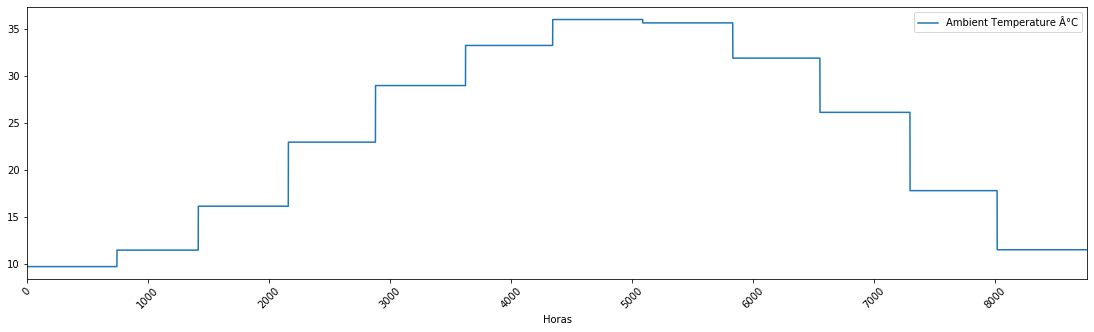

In [ ]:
df = DataFrame(data,columns=['Horas','Ambient Temperature Â°C'])   #, index=pd.Date_range(start='01/01/2007 00:00', end='31/12/2007 23:00')
df.plot(x ='Horas', y='Ambient Temperature Â°C',rot=45, figsize=(19,5)) 

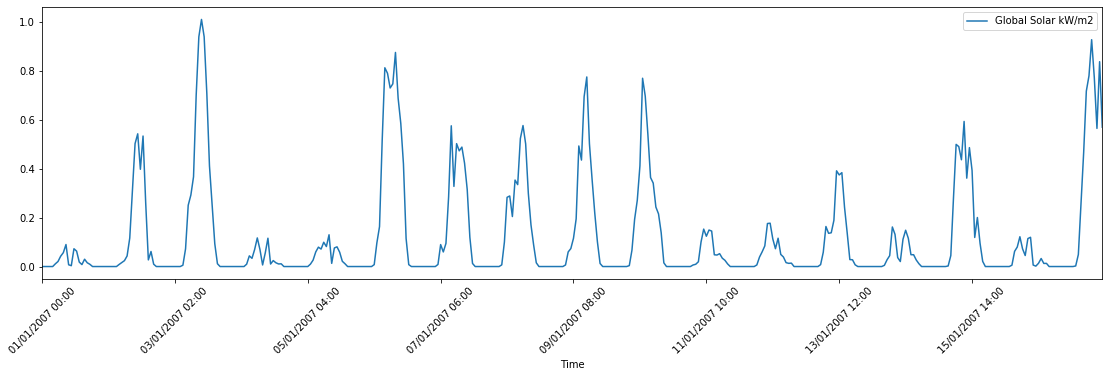

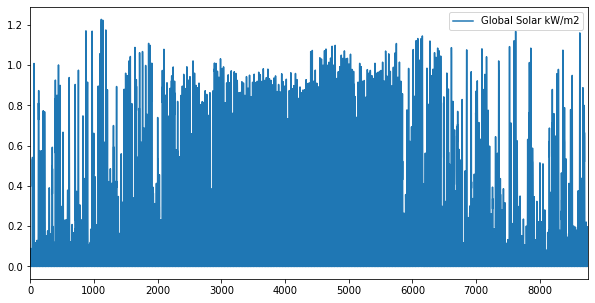

In [ ]:
### plot

df = DataFrame(data,columns=['Time','Global Solar kW/m2'])   #, index=pd.Date_range(start='01/01/2007 00:00', end='31/12/2007 23:00')
df.iloc[0:400].plot(x ='Time', y='Global Solar kW/m2',rot=45, figsize=(19,5)) 
df.plot(figsize=(10,5))	
#df.plot(figsize=(40,5))	

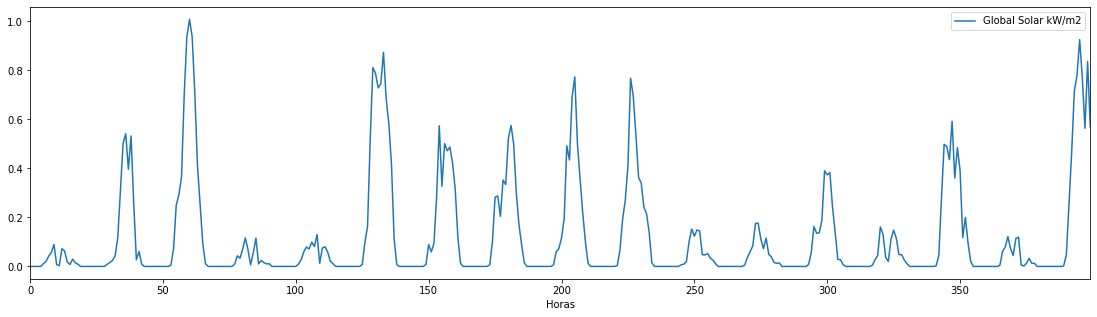

In [ ]:
### plot

df = DataFrame(data,columns=['Horas','Global Solar kW/m2'])   #, index=pd.Date_range(start='01/01/2007 00:00', end='31/12/2007 23:00')
df.iloc[0:400].plot(x ='Horas', y='Global Solar kW/m2', figsize=(19,5)) 
#df.plot(figsize=(10,5))	
#df.plot(figsize=(40,5))	

In [ ]:
data2=pd.read_csv("data_tem_rad_outpv.csv",encoding='latin1')
data2

,Horas,Power Output kw,Ambient Temperature ¶øC,Global Solar kW/m2
0,0,0.0,9.742831,0.0
1,1,0.0,9.742831,0.0
2,2,0.0,9.742831,0.0
3,3,0.0,9.742831,0.0
4,4,0.0,9.742831,0.0
...,...,...,...,...
8755,8755,0.0,11.537830,0.0
8756,8756,0.0,11.537830,0.0
8757,8757,0.0,11.537830,0.0
8758,8758,0.0,11.537830,0.0


In [ ]:
del data2["Horas"]

In [ ]:
data2

,Power Output kw,Ambient Temperature ¶øC,Global Solar kW/m2
0,0.0,9.742831,0.0
1,0.0,9.742831,0.0
2,0.0,9.742831,0.0
3,0.0,9.742831,0.0
4,0.0,9.742831,0.0
...,...,...,...
8755,0.0,11.537830,0.0
8756,0.0,11.537830,0.0
8757,0.0,11.537830,0.0
8758,0.0,11.537830,0.0


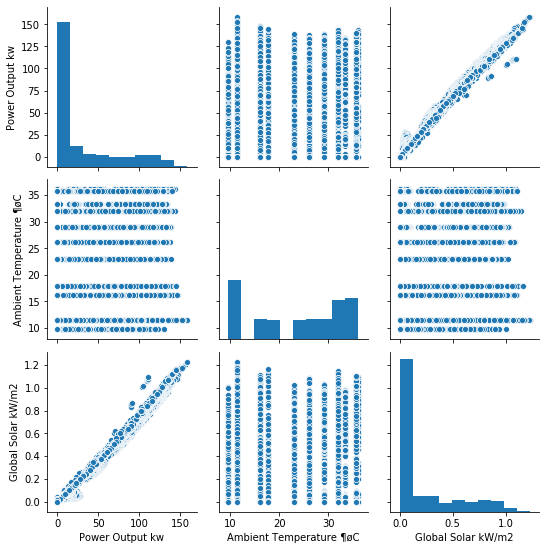

In [ ]:
import seaborn as sns
g = sns.pairplot(data2, diag_kind="hist")  



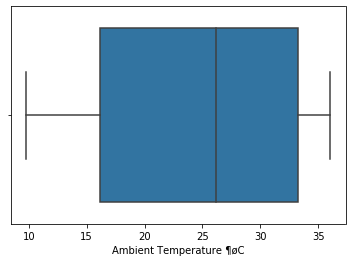

In [ ]:
ax = sns.boxplot(x='Ambient Temperature ¶øC', data=data2)


Text(1.0, 1.0, 'Boxplot with jitter')

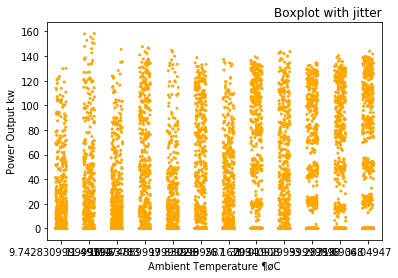

In [ ]:
ax = sns.stripplot(x='Ambient Temperature ¶øC', y='Power Output kw', data=data2, color="orange", jitter=0.2, size=3)
plt.title("Boxplot with jitter", loc="right")

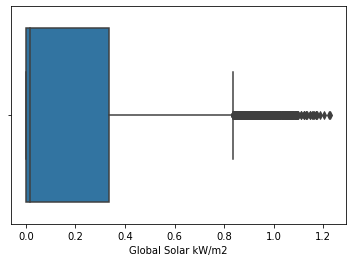

In [ ]:
ax = sns.boxplot(x='Global Solar kW/m2', data=data2)

Text(1.0, 1.0, 'Boxplot with jitter')

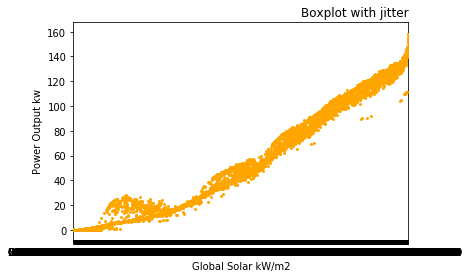

In [ ]:
ax = sns.stripplot(x='Global Solar kW/m2', y='Power Output kw', data=data2, color="orange", jitter=0.2, size=3)
plt.title("Boxplot with jitter", loc="right")

In [ ]:
### separando data
x = data2.drop('Power Output kw', axis=1)
y = data2['Power Output kw']

In [ ]:
from sklearn.model_selection import train_test_split

# Usamos método "train_test_split" para usar el 20% de la data para validar el modelo.
# El parámetro "random state" nos sirve para poder replicar la misma separación.
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.20)
print('Train shape: ',x_train.shape)
print('Validation shape: ',x_val.shape)


Train shape:  (7008, 2)
Validation shape:  (1752, 2)


In [ ]:
### ENTRENANDO
from sklearn.tree import DecisionTreeRegressor
regresion = DecisionTreeRegressor(max_depth = 3)
regresion = regresion.fit (x_train, y_train)

In [ ]:
regresion.score(x_train,y_train)

0.987888288422747

In [ ]:
regresion.score(x_val,y_val)

0.9865865479854327

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
#### optima profundidad
max_depth_range = list(range(3, 46)) #Reemplazar el max valor (15) con la máxima profundidad por defecto para su arbol +1
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeRegressor(max_depth = depth)
    clf.fit(x_train, y_train)    
    score = clf.score(x_val, y_val)
    
    accuracy.append(score)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

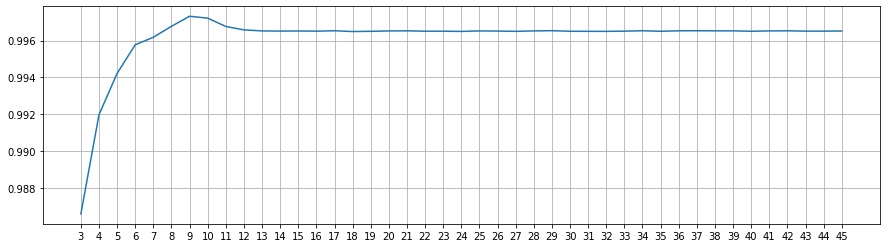

In [ ]:
plt.figure(figsize=(15,4)) #Tamaño del Gráfico en inches
plt.plot(accuracy)
plt.xticks(list(range(len(max_depth_range))),max_depth_range)
plt.grid()
plt.show()

In [ ]:
## optima profundidad
regresion = DecisionTreeRegressor(max_depth = 9)
regresion = regresion.fit (x_train, y_train)

In [ ]:
regresion.score(x_train,y_train)

0.9989606061324243

In [ ]:
regresion.score(x_val,y_val)

0.9973353187963857

In [ ]:
### squar
from sklearn.metrics import mean_squared_error, r2_score
model_score = regresion.score(x_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('coefficient of determination R^2 of the prediction.:',model_score)
y_predicted = regresion.predict(x_val)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_val, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_val, y_predicted))



coefficient of determination R^2 of the prediction.: 0.9989606061324243
Mean squared error: 4.53
Test Variance score: 1.00


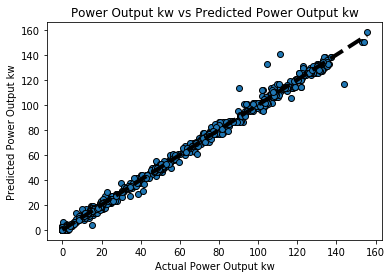

In [ ]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_val, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
ax.set_xlabel('Actual Power Output kw')
ax.set_ylabel('Predicted Power Output kw')
ax.set_title("Power Output kw vs Predicted Power Output kw")
plt.show()

In [ ]:
pip install dtreeviz

In [ ]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(regresion,X_train=x, y_train=y, feature_names=x['Ambient Temperature ¶øC',	'Global Solar kW/m2']
              
viz.view()

SyntaxError: ignored

In [ ]:
from dtreeviz.trees import dtreeviz


In [ ]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(clf,
               iris['data'],
               iris['target'],
               target_name='',
               feature_names=np.array(iris['feature_names']),
               class_names={0:'setosa',1:'versicolor',2:'virginica'})
              
viz

In [ ]:

 viz = dtreeviz(regresion, x_train, y_val, target_name='Power Output kw', feature_names='Ambient Temperature ¶øC','Global Solar kW/m2')              
          


IndentationError: ignored